## 1. Introduction

### 人工智慧的分級

- 第一級：自動控制
- 第二級：探索推論、運用知識
- 第三級：機器學習
- 第四級：深度學習

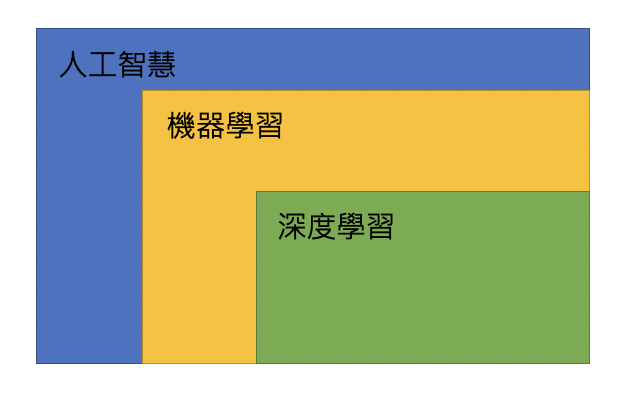

人工智慧是讓機器可以展現人類的智慧，基本上是一個讓電腦執行人類工作的廣泛用語。

- 人工智慧可以泛稱機器展現人類的智慧，包含第一級自動化流程控制、第二級的專家知識。
  第一級是寫 if else ，若是開發一個聊天機器人，則開發者需要寫很多條件去猜想顧客可能回答的問題。
  第二級是加入該領域的專家，可以協助開發者更完整地解決一個問題。例如，請聊天專家協助開發聊天機器人，猜想顧客的問題以及滿意的回覆。

- 機器學習則是透過演算法學習資料的樣態，企圖給予機器讓它去學習一套規則或技能，通常可以建立一個模型去預測新的數據，而機器學習可以分成三種：

    - 監督式學習：從過去標記過的資料來進行訓練模型，這個模型可以預測沒見過的數據

      例如：訓練大量的電子郵件，跟機器說哪些是垃圾郵寄哪些不是，請機器去預測未來的郵件是否是垃圾郵件

    - 非監督式學習：給予資料卻不給與正確的答案，讓模型從資料中找尋潛在的規則

      例如：由於人力標示成本耗時耗力，給予機器很多動物的圖片來找尋分類規則

    - 強化式學習：讓機器學習當前的狀態，通常包含獎懲機制。

      例如：請機器下圍棋，最後跟機器說是輸還是贏；讓電腦玩馬力歐遊戲

      類似人類學習的過程，如果犯法會有懲罰，如果做好事會得到別人的稱讚

- 深度學習是機器學習其中一種方法，藉由模仿人類的神經元傳遞，建立許多深層的網路建構，可以去學習更複雜的工作。
  例如：影像辨識、手寫辨識、語音辨識複雜工作等等


## 2. Model Building Workflow

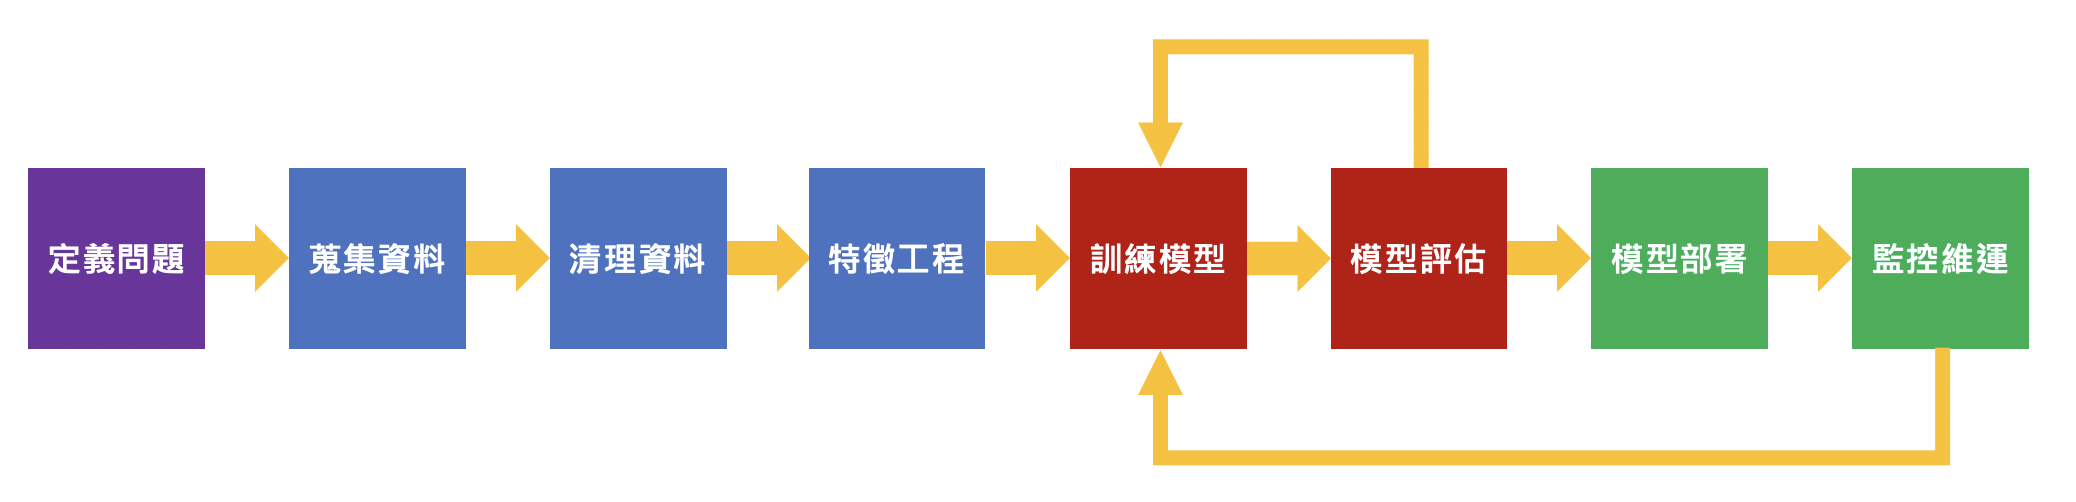

模型開發流程可以粗略分成以上幾個步驟：

- 定義問題：一開始與需求方討論和定義想要解決的問題

- 蒐集資料：蒐集需要訓練的資料或是答案，可能採用爬蟲或從資料庫拿取等方式

- 清理資料：這些資料很有可能格式不一致，或是有可能有空值的情形需要進行資料處理

- 特徵工程：這通常需要 Domain Knowledge，對於資料有相當程度地了解的人，對資料萃取新的特徵以增加模型準度

- 訓練模型：此階段耗費的時間長短會決定於選擇的演算法、資料樣本大小、硬體資源(是否有GPU)等等

- 模型評估：開發者會依照問題選擇不同的評估方式，通常會有一個 baseline 成效，接著開發者的工作是想方設法地超越它

- 模型部署：若模型成效已經達到需求方滿意的水準之後，就會讓模型上線並實際應用

- 監控維運：模型開發後並不是結束，而是另一個開始，通常開發者需要肩負維運的責任
     
  通常隨著時間模型成效會下降，這時候就需要有 re-train 的機制，讓模型重新進行訓練

此外，箭頭的指向也可能會變動，僅是提供大致方向參考

## 3. Evaluating Models Performance

由於我們需要有指標來衡量一個模型的好壞，而問題可以粗略分成「分類」和「回歸」問題

根據不同的問題，我們所選用的衡量指標也會不同

### 3.1 混肴矩陣(Confusion Matrix)
如果分類問題假設只有分真和假，左邊是代表實際的情況，上面是代表預測的情況

False Positive 是 Type Ⅰ Error

False Negative 是 Type Ⅱ Error，通常型二錯誤是比較嚴重的錯誤

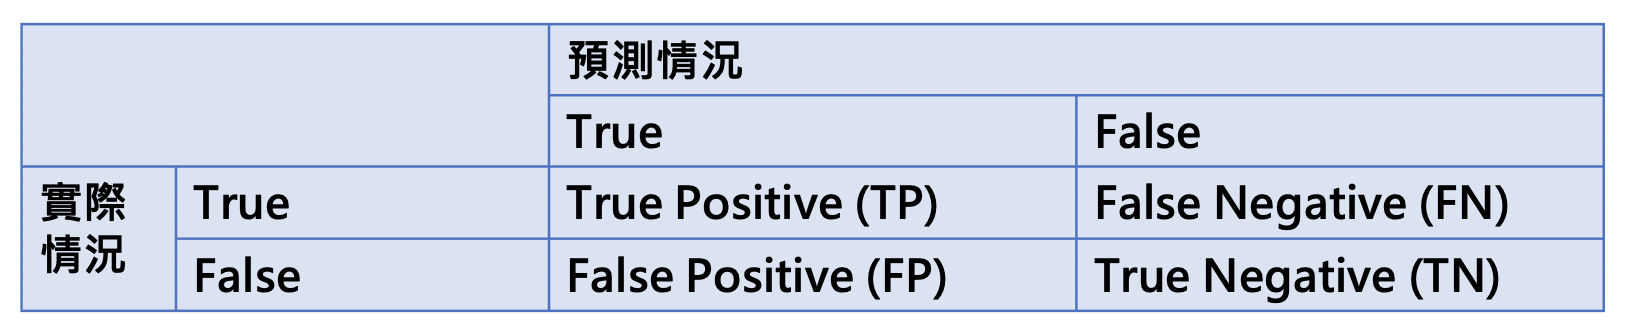

- Accuracy: 準確率，計算正確預測的佔比
  $$ accuracy = \dfrac{TP+TN}{TP+FN+FP+TN}$$
- Precision: 精準率，計算在預測情況為真，實際情況為真的佔比
  $$ precision = \dfrac{TP}{TP+FP}$$
- Recall: 召回率，計算在實際情況為真，預測情況為真的佔比
  $$ recall = \dfrac{TP}{TP+FN}$$
- F1-Score: 是 percision 和 recall 的調和平均，會考慮兩個指標
  $$ F1-score = \dfrac{2}{\dfrac{1}{precision}+\dfrac{1}{recall}}$$ or $$ F1-score = \dfrac{2 \times precision \times recall }{precision + recall}$$

為什麼我們要有不同的指標，難道不能只看準確率(Accuracy)嗎？

假設有一個模型預測癌症，一萬人之中真實只有10人獲得癌症，因此該模型都只要回覆健康，準確率高達 99.90％

但這並不是我們所想要的，我們就是想要找出誰有得癌症！準確率再高也解決不了醫生的需求，根本只是盲猜
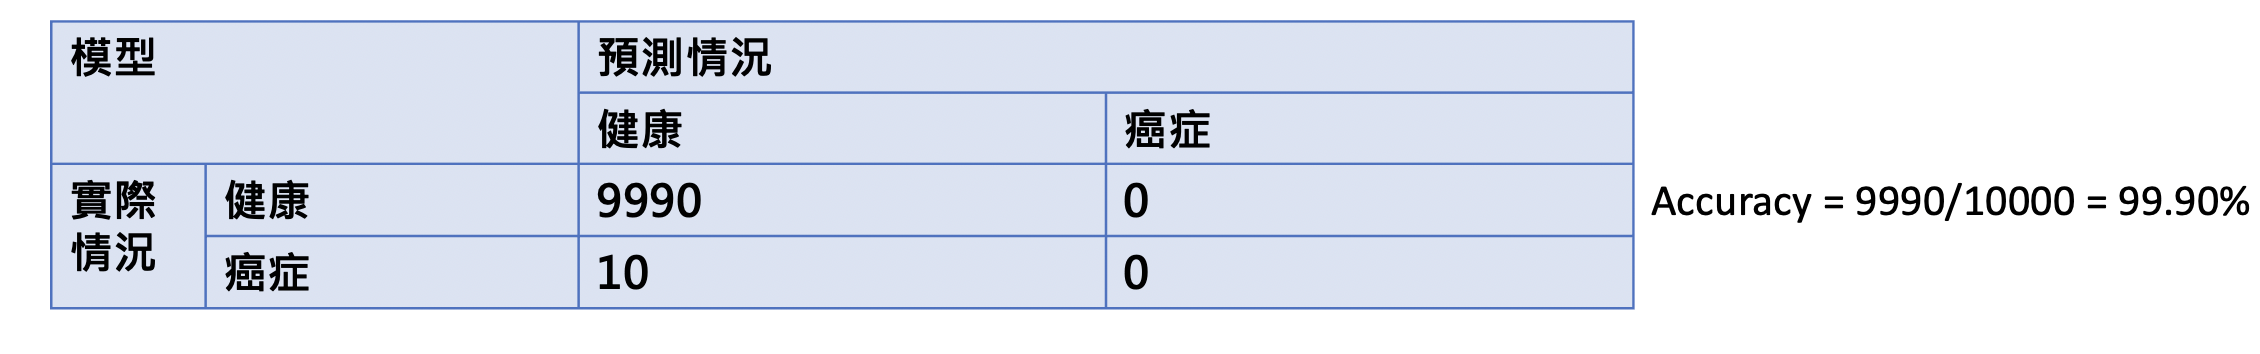

在此，癌症病患是我們想要預測的事情，很顯然地，由於沒有判斷出任何一個有癌症的病患，使用其他指標均會 0

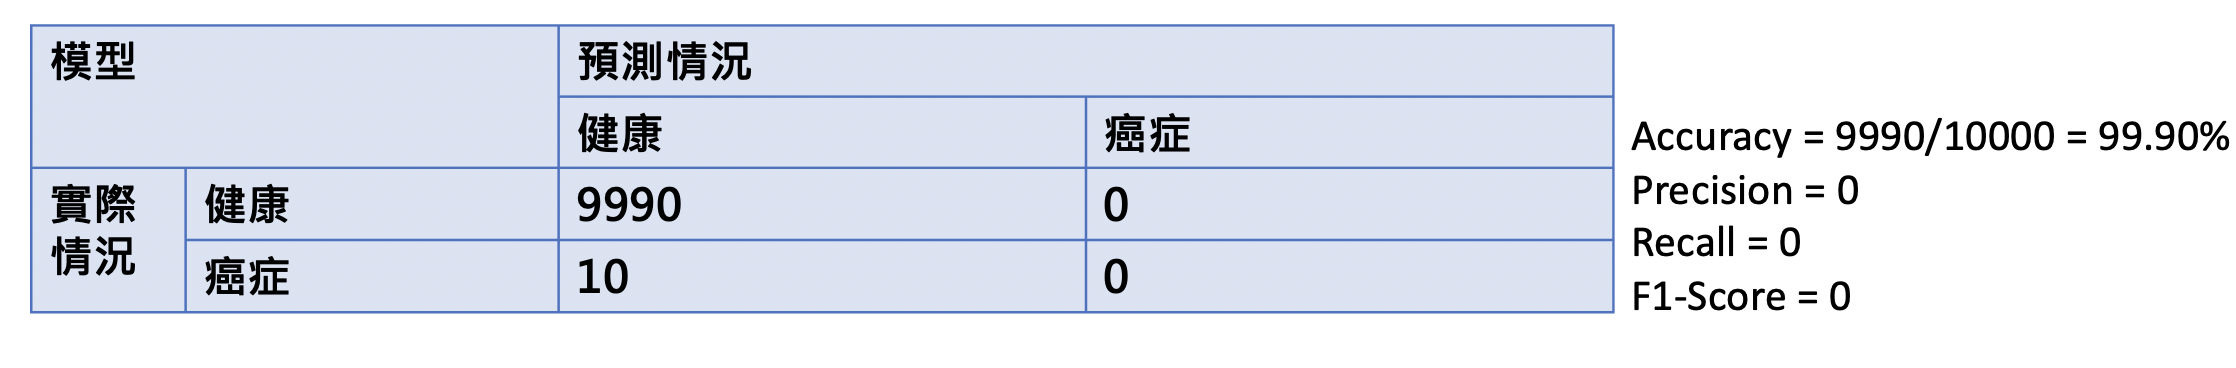

因此通常會看問題的種類而決定要使用的評估指標：

- Recall: 由於型二錯誤(FN)代價很高(實際是癌症但卻檢驗不是)

- Precision: 由於型一錯誤(FP)代價很高(例如把正常郵件辨識為垃圾郵件)

- F1 score: 綜合考量以上兩個指標

### 3.2 ROC曲線與AUC
- ROC (Receiver operator characteristic): 接收者操作特徵曲線，該曲線是由混淆矩陣算出
  
- AUC (Area Under Curve): ROC 曲線下的面積

ROC 曲線是以 FPR 為 X 軸；以 TPR 為 Y 軸

- FPR:
  $$ FPR = 1 - Specificity = \dfrac{FP}{FP+TN}$$

- TPR:
  $$ TPR = Sensitivity = recall = \dfrac{TP}{TP+FN}$$

假設我們現在有4個測試樣本，label代表 ground truth(1表示真，0表示假)，score則是為真的機率值

- 1. 對 score 做降冪排序，可以得到右表
- 2. 針對每一個依序計算 TPR、FPR

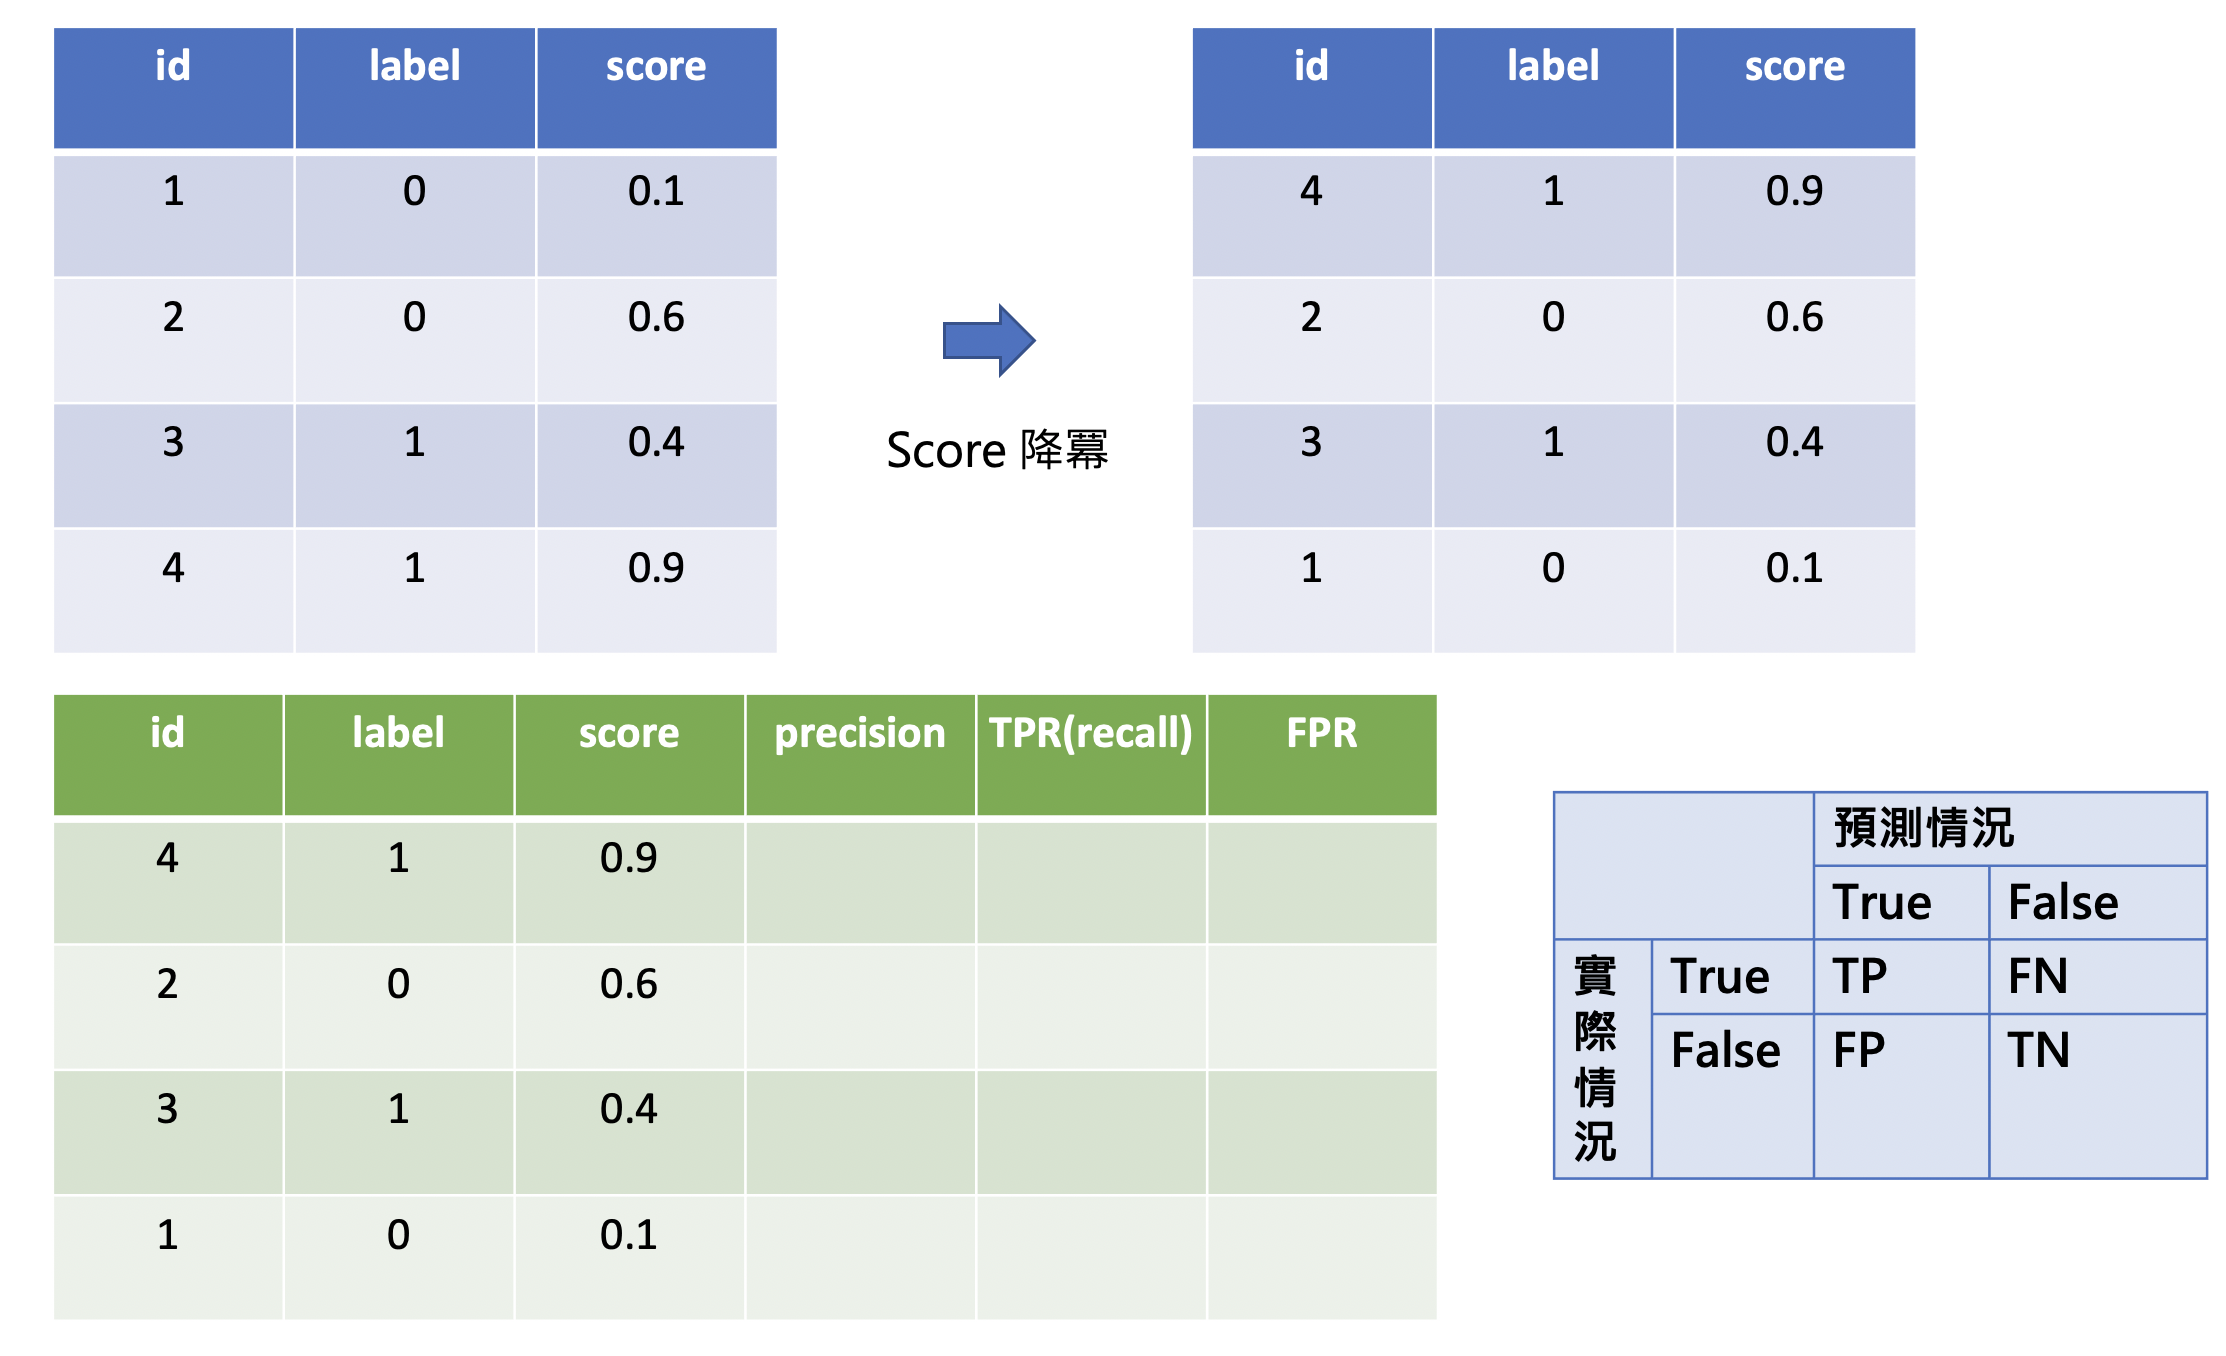

針對第一筆，只要是 score 超過 0.9 都視為真

precistion:預測為真，真實是真的機率是 1

TPR: 真實為真，預測是真的機率是 0.5

FPR: 真實為假，預測是真的機率是 0

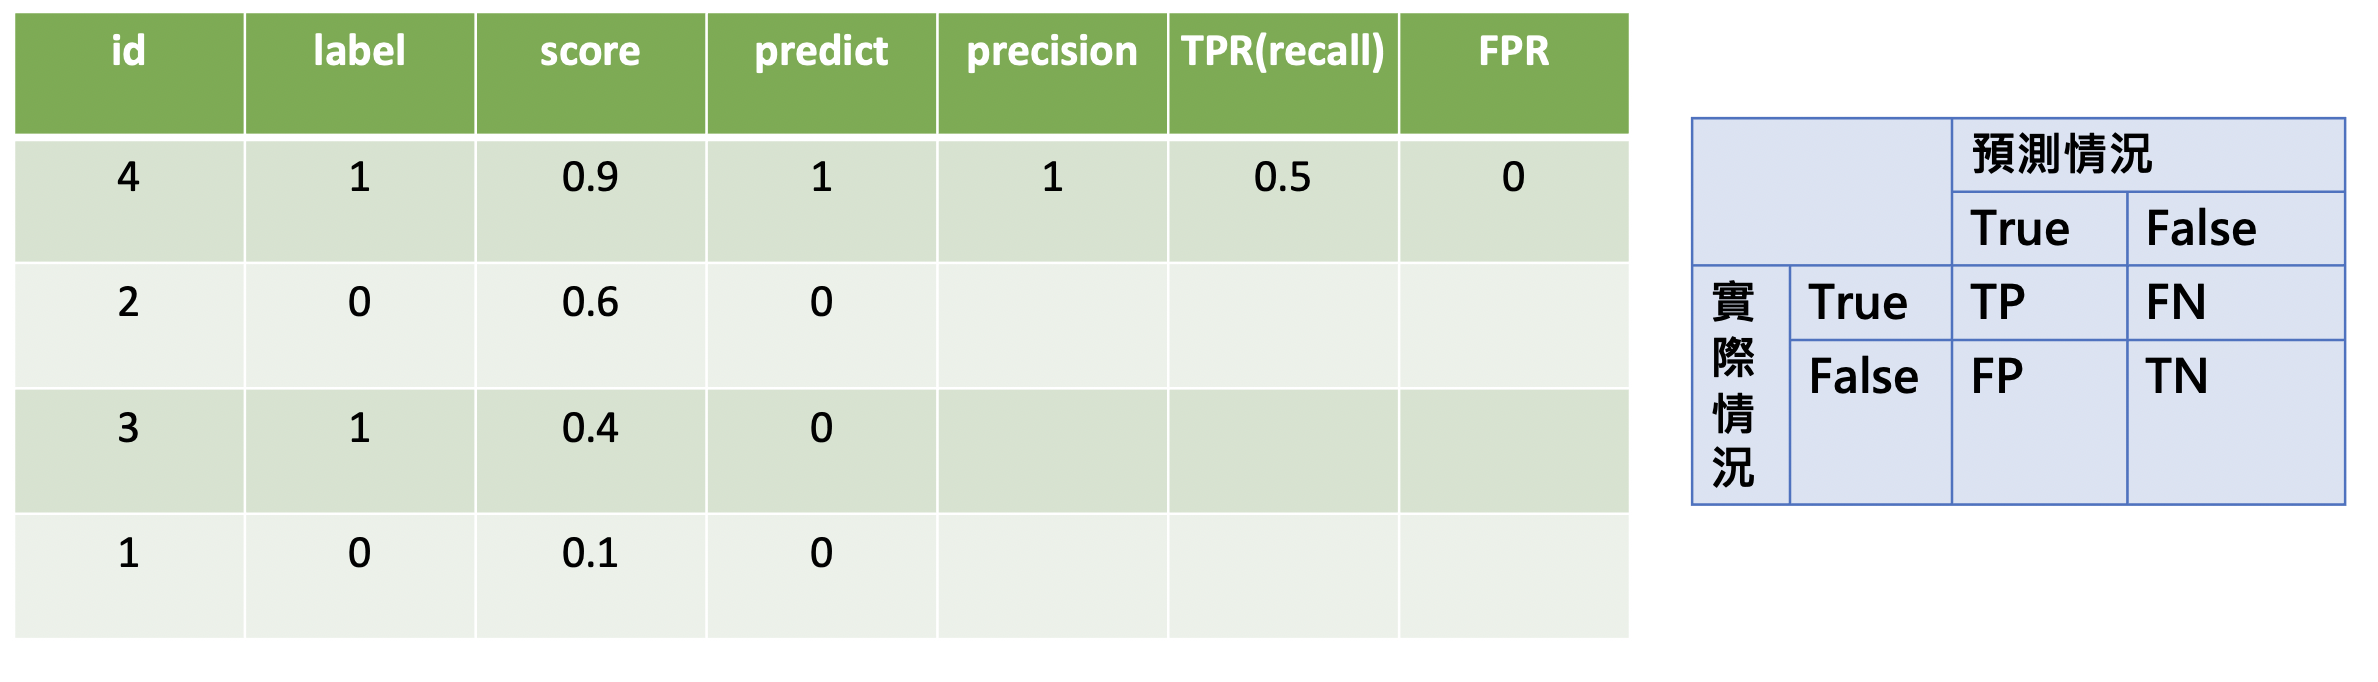

針對第二筆，只要是 score 超過 0.6 都視為真

precistion:預測為真，真實是真的機率是 0.5

TPR: 真實為真，預測是真的機率是 0.5

FPR: 真實為假，預測是真的機率是 0.5

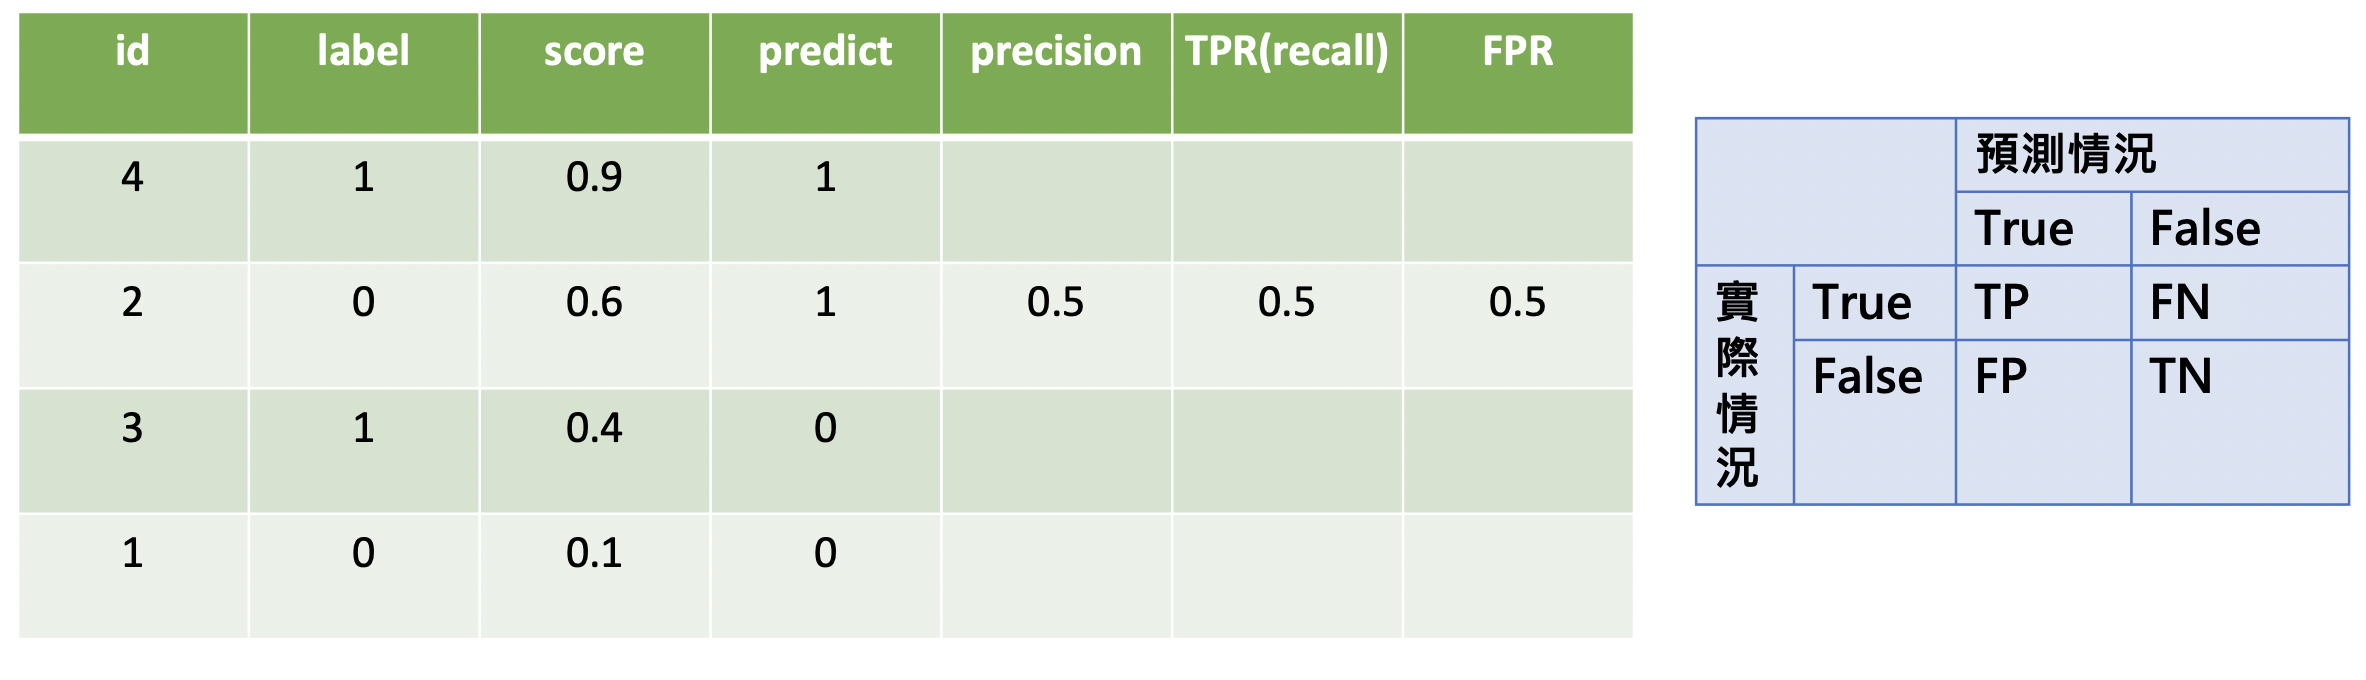

最後完成此表可以得到

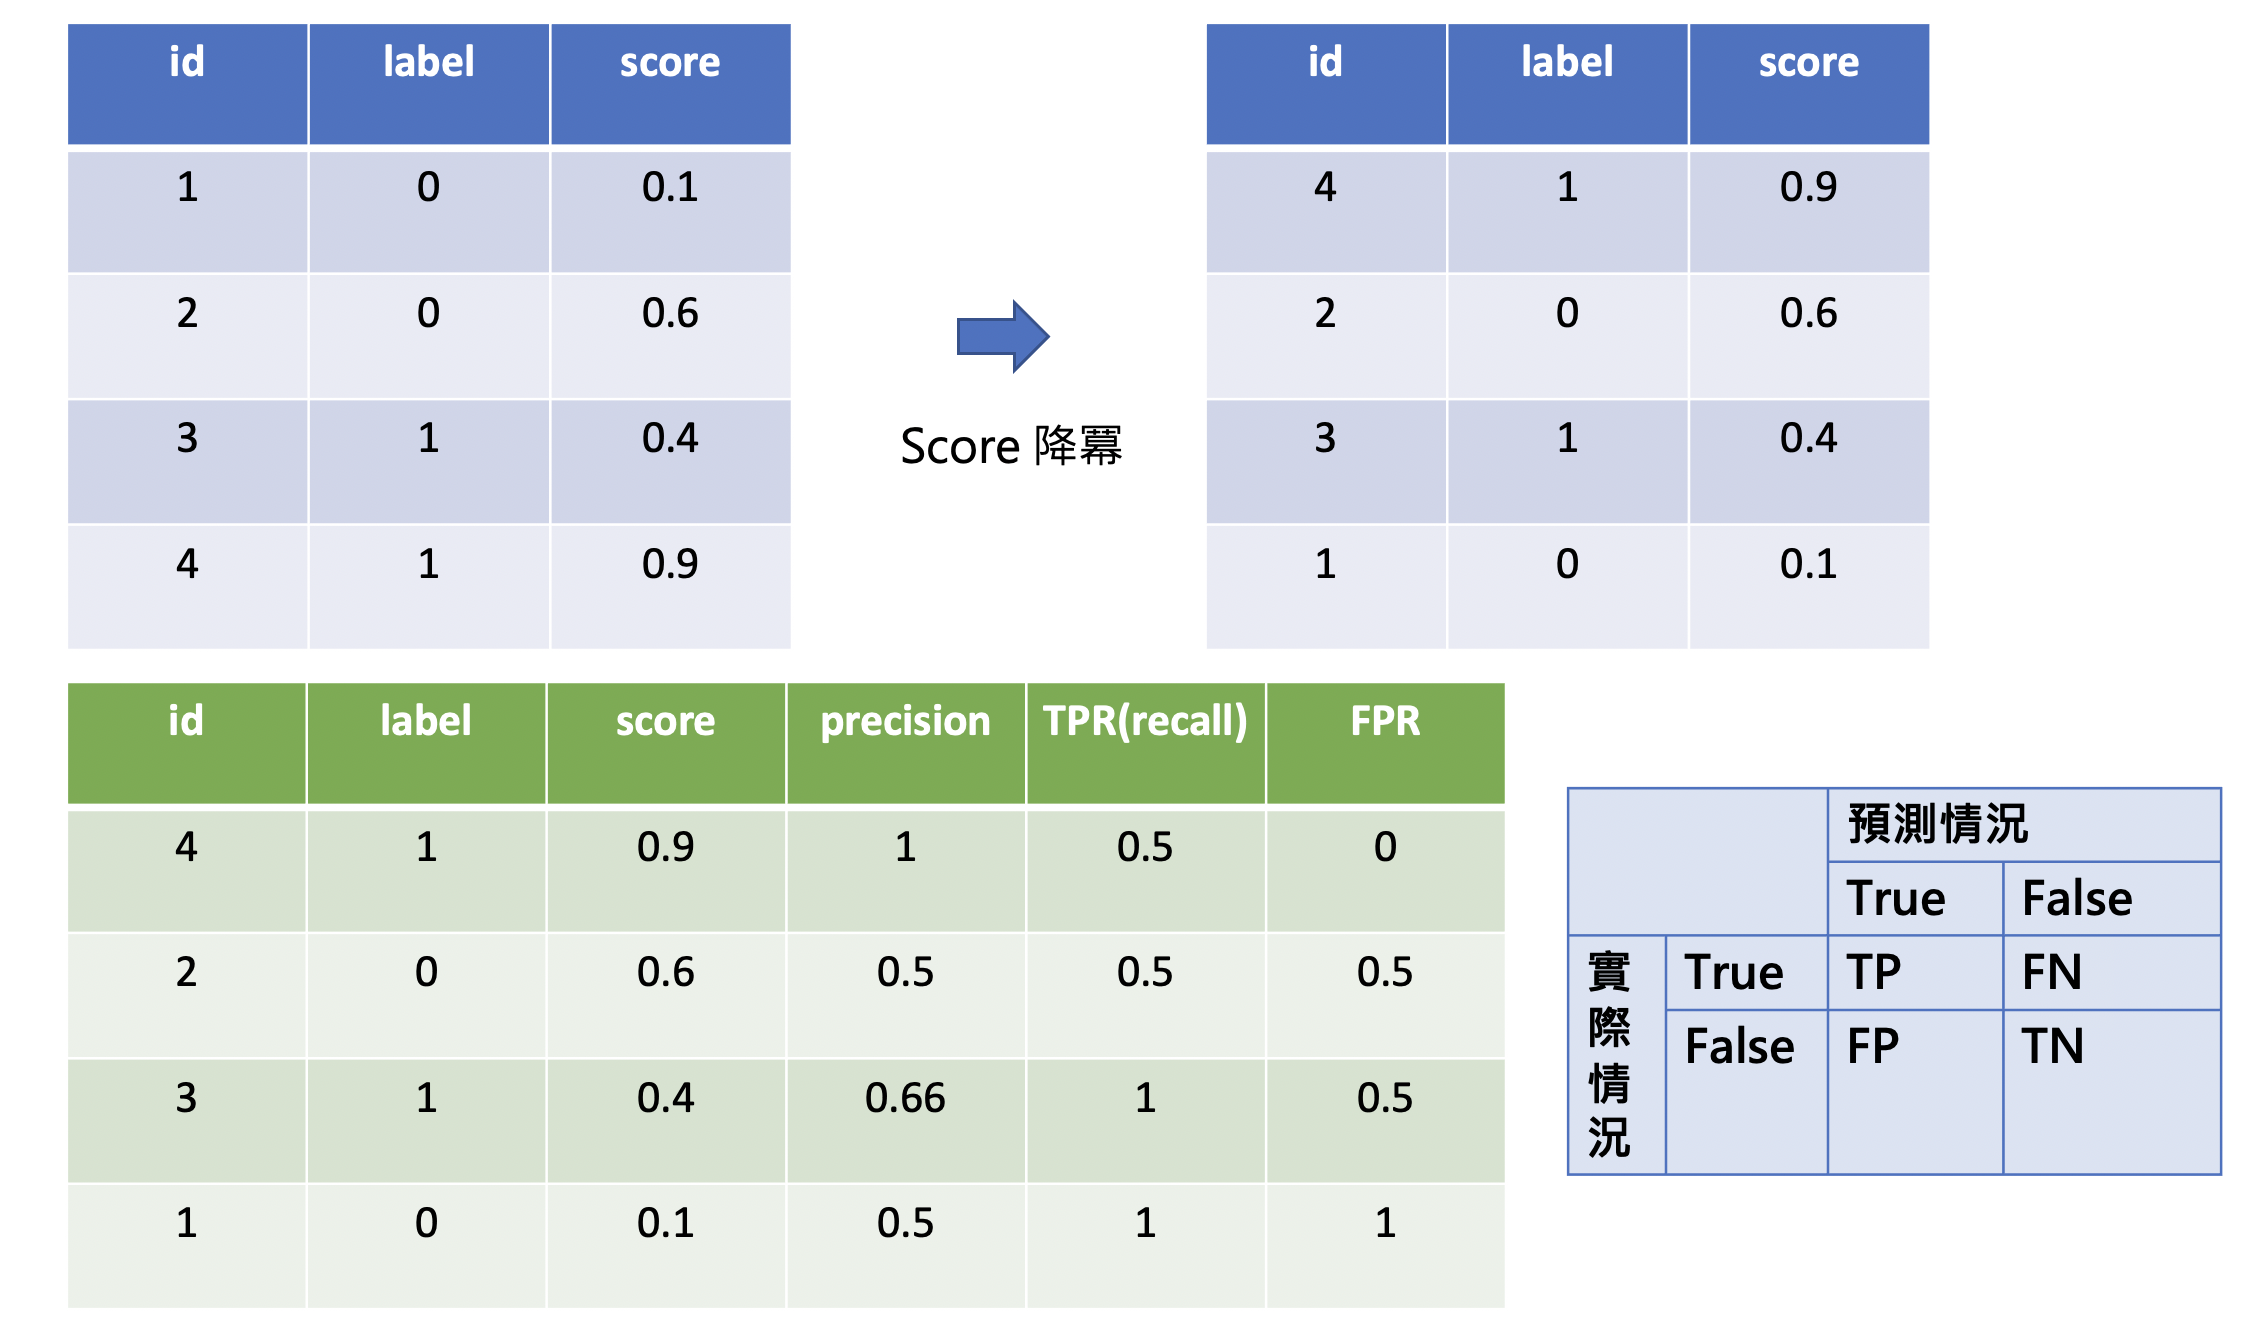

由上表我們可以得到 (FPR, TPR)

(0, 0.5)

(0.5,0.5)

(0.5,1)

(1,1)


得到這些點並連線就是 ROC 曲線

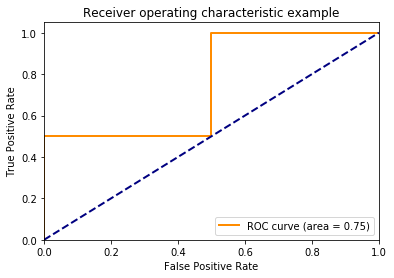

In [49]:
import numpy as np
from sklearn.metrics import roc_curve, auc
y = np.array([0, 0, 1, 1])
scores = np.array([0.1, 0.6, 0.4, 0.9])
fpr, tpr, _ = roc_curve(y, scores)
roc_auc = auc(fpr, tpr)

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


最好的模型是繪製到左上角，反之則差
而AUC 是 ROC 的曲線下的面積，因此介於 0~1 之間，而藍色的線代表是隨機猜測的模型

AUC 可以表示一個模型的好壞，一般的標準是：


| AUC      | 說明 | 
| -------- | -------- |
| 1        | 最好的模型     |
| > 0.85        | 效果很好     |
| 0.7 ~ 0.85        | 效果一般     |
| 0.5 ~ 0.7       | 效果低     |
| 0.5        | 隨機猜測的模型(丟銅板)     |
| <0.5        | 比隨機猜測還要差的模型     |

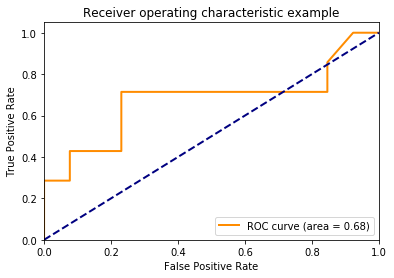

In [62]:
# 複雜一點的交給程式來畫吧！

import numpy as np
from sklearn.metrics import roc_curve, auc
y = np.array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0])
scores = np.array([0.99, 0.44, 0.19, 0.33, 0.7, 0.32, 0.64, 0.54, 0.28, 0.16, 0.83, 0.67, 0.51, 0.60, 0.55, 0.49, 0.69, 0.65, 0.19, 0.47])
fpr, tpr, _ = roc_curve(y, scores)
roc_auc = auc(fpr, tpr)

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### 3.3 回歸指標

預測值要與真實值越近越好，因此下面兩個指標如果越大代表模型越不好

| 指標      | 中文 | 數學式 |
| -------- | -------- | ------ | 
| Mean Squared Error, MSE        | 均方誤差     | $$MSE(y, \hat y)\, = \, \frac{1}{n}\sum_\limits{i=1}^n (y - \hat y)^2$$ |
| Mean Absolute Error, MAE       | 平均絕對誤差     | $$MAE(y, \hat y)\, = \, \frac{1}{n}\sum_\limits{i=1}^n |y - \hat y|$$ | 
| Root Mean Absolute Error, RMAE       | 均方根誤差     | $$RMAE(y, \hat y)\, = \, \sqrt{\frac{1}{n}\sum_\limits{i=1}^n (y - \hat y)^2}$$ | 